### Gerekli Kütüphaneleri Aktaralım

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Veri Seti Inceleme

Veri setinin icindeki veriler hakkinda bir ongoru ve bilgi sahibi olmak icin veriyi inceledigimiz kisim.

In [2]:
df = pd.read_csv('diabetes.csv')
df2 = df.copy() # Orjinal datayi ileride kullanip goruntuleyebilmek icin kopyasini olusturdum.
df2.head() # Ilk 5 satiri goruntuleyip veri hakkinda ufak bir bilgi edinmek icin

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Gerçekten boş değer yok mu acaba?

In [5]:
(df2 == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Malesef boş değerlerimiz var. Yukardaki grafiği incelediğimizde şu çıkarımları yapabiliriz:
Bir kadın hamile kalmak zorunda değil / Erkekler hamile kalamaz. 0 değeri pregnancies için mantıklı.
Ama hiç bir insanın kan şekeri, tansiyonu, deri kalınlığı, insulin değeri, vucut kitle endeksi 0 olamaz. Biyolojik olarak mümkün değil.
Bu da 0 olan değerler aslında boş bırakılmış nan değerlerdir demek oluyor.;

In [6]:
# Bos degerleri doldurmak icin
# Verileri yasa gore kategori edilmis bir sekilde doldurmak istiyorum yani 0-34 genc, 35-59 Orta Yas, 60+ yasli olacak sekilde
df2['Age_Band'] = df2.agg(lambda row: 'Young' if row['Age'] <= 34 else 
                           'Middle Age' if 35 <= row['Age'] <= 59 else 'Old', axis=1)

### Şimdi sütünlarımızı inceleyebiliriz.

Oncelikle diyabetin ne oldugu ogrenmemiz, diyabete neyin sebep oldugunu bilmemiz elimizdeki verileri daha iyi bir model egitmekte kullanbilmemize imkan veriyor.\
Diyabetin Tip 1 ve Tip 2 olmak uzere iki turu var.\
*Tip 1*, diyabette pankreas vucudun ihtiyaci olan uretemez veya uretse bile bagisik sistemi tarafindan absorbe edilir ve ihtiyaci olan insulin hormonuna erisim saglayamaz. Genetik olarak cok erken yasta bile baslayabilir.\
*Tip 2*, diyabette ise pankreas insulin hormonu uretimini saglar amainsulin hormonunu algilayan reseptorler olmadigindan bir ise yaramazlar ve kanda gereksiz insulin fazlaligi olur. Insulinler reseptore baglanmadigindan gerekli islevi yerine getiremezler. Genetigin etkisi olsada daha cok ileriki yaslarda gozlenir ve yasam tarzina bagli ortaya cikar.\
Buradan elde ettigimiz bilgilerle veri setini gorsellestirip anlamlastirmaya calisalim.

In [7]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute the missing 'Insulin' values using KNN
df2[['Insulin']] = imputer.fit_transform(df2[['Insulin']])

# Apply log transformation
df2['Log_Insulin'] = np.log1p(df2['Insulin'])

df2['Glucose_Insulin_Ratio'] = df2['Glucose'] / (df2['Log_Insulin'] + 1)
df2['Insulin'].sort_values()

62       0.0
764      0.0
60       0.0
58       0.0
55       0.0
       ...  
409    579.0
584    600.0
247    680.0
228    744.0
13     846.0
Name: Insulin, Length: 768, dtype: float64

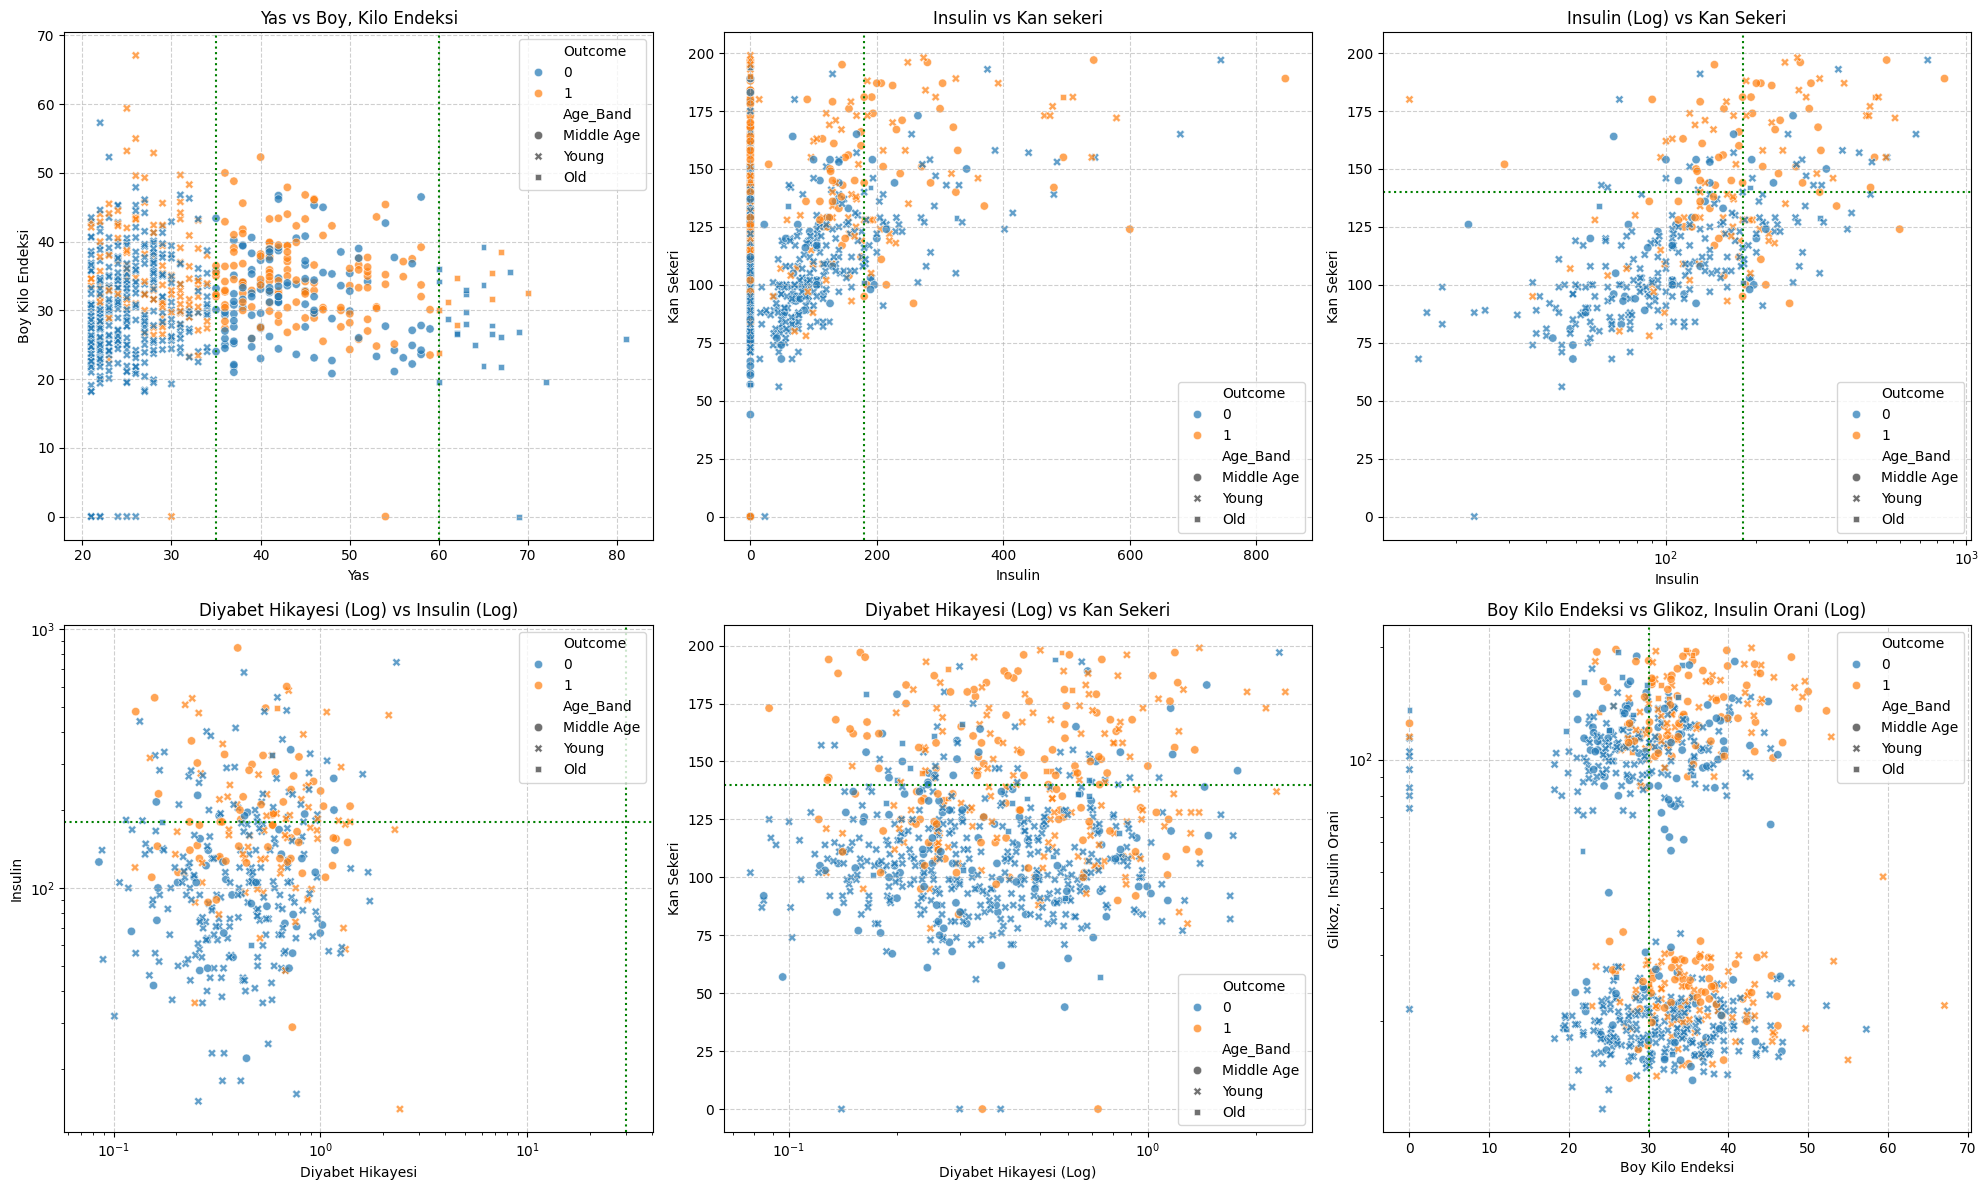

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

ax1 = sns.scatterplot(data=df2, x="Age", y="BMI", hue="Outcome", style='Age_Band', alpha=0.7, ax=axes[0,0])
axes[0,0].axvline(x=35, linestyle=':', color='green', label='Young')
axes[0,0].axvline(x=60, linestyle=':', color='green', label='Middle Age')
axes[0,0].grid(alpha=0.6, linestyle='--')
axes[0,0].set_xlabel('Yas')
axes[0,0].set_ylabel('Boy Kilo Endeksi')
axes[0,0].set_title("Yas vs Boy, Kilo Endeksi")

ax2 = sns.scatterplot(data=df2, x="Insulin", y="Glucose", hue="Outcome", style='Age_Band', alpha=0.7, ax=axes[0,1])
axes[0,1].grid(alpha=0.6, linestyle='--')
axes[0,1].axvline(x=180, linestyle=':', color='green', label='Normal Insulin Sekeri')
axes[0,1].set_ylabel('Kan Sekeri')
axes[0,1].set_title("Insulin vs Kan sekeri")

ax3 = sns.scatterplot(data=df2, x="Insulin", y="Glucose", hue="Outcome", style='Age_Band', alpha=0.7, ax=axes[0,2])
axes[0,2].set_xscale('log')
axes[0,2].grid(alpha=0.6, linestyle='--')
axes[0,2].axvline(x=180, linestyle=':', color='green', label='Normal Insulin Sekeri')
axes[0,2].axhline(y=140, linestyle=':', color='green', label='Normal Kan Sekeri')
axes[0,2].set_ylabel('Kan Sekeri')
axes[0,2].set_title("Insulin (Log) vs Kan Sekeri")

ax4 = sns.scatterplot(data=df2, x="DiabetesPedigreeFunction", y="Insulin", hue="Outcome", style='Age_Band', alpha=0.7, ax=axes[1,0])
axes[1,0].axvline(x=30, linestyle=':', color='green',label='Overweight')
axes[1,0].set_yscale('log')
axes[1,0].set_xscale('log')
axes[1,0].set_xlabel('Diyabet Hikayesi')
axes[1,0].axhline(y=180, linestyle=':', color='green', label='Normal Insulin Sekeri')
axes[1,0].grid(alpha=0.6 ,linestyle='--')
axes[1,0].set_title('Diyabet Hikayesi (Log) vs Insulin (Log)')

ax5 = sns.scatterplot(data=df2, x="DiabetesPedigreeFunction", y="Glucose", hue="Outcome", style='Age_Band', alpha=0.7, ax=axes[1,1])
axes[1,1].set_xscale('log')
axes[1,1].grid(alpha=0.6 ,linestyle='--')
axes[1,1].axhline(y=140, linestyle=':', color='green', label='Normal Kan Sekeri')
axes[1,1].set_xlabel('Diyabet Hikayesi (Log)')
axes[1,1].set_ylabel('Kan Sekeri')
axes[1,1].set_title("Diyabet Hikayesi (Log) vs Kan Sekeri")

ax6 = sns.scatterplot(data=df2, x="BMI", y="Glucose_Insulin_Ratio", hue="Outcome", style='Age_Band', alpha=0.7, ax=axes[1,2])
axes[1,2].axvline(x=30, linestyle=':', color='green',label='Overweight')
axes[1,2].set_yscale('log')
axes[1,2].grid(alpha=0.6 ,linestyle='--')
axes[1,2].set_xlabel('Boy Kilo Endeksi')
axes[1,2].set_ylabel('Glikoz, Insulin Orani')
axes[1,2].set_title('Boy Kilo Endeksi vs Glikoz, Insulin Orani (Log)')

plt.tight_layout()
plt.show()

Bazi grafiklerde birseyler yanlis gibi duruyor, sanki karekok grafigine benzer bir yol izlemis veriler. X eksenideki degerleri logaritma degerleriyle degistirerek bunu duzeltigimde daha anlamli grafikler cikti. Bu grafiklerden yola cikarak modelin daha iyi ogrenmesi icin birkac features daha ekledim.

In [9]:
df2['DiabetesHistory_Insulin'] = df2['DiabetesPedigreeFunction'] * df2['Insulin']
df2['BMI_Glucose'] = df2['BMI'] * df2['Glucose']
df2['BMI_Glucose_Insulin'] = df2['BMI_Glucose'] / df2['Insulin']
df2['Avrg_Insulin_Resistance'] =  df2['Glucose'] * df2['Insulin'] / 405

In [16]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome', 'Age_Band', 'Log_Insulin',
       'Glucose_Insulin_Ratio', 'DiabetesHistory_Insulin', 'BMI_Glucose',
       'BMI_Glucose_Insulin', 'Avrg_Insulin_Resistance', 'Old', 'Young'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler


df_encoded = pd.get_dummies(df2['Age_Band'], drop_first=True)
df2 = pd.concat(objs=[df2, df_encoded], axis=1)

In [12]:
df2.drop(labels=['Age'], axis=1, inplace=True)

In [13]:
# Define the target variable and features
Y = df['Outcome']
X = df.drop('Outcome', axis=1)
train_list = []
test_list = []

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=160, stratify=df['Outcome'])

scaler = StandardScaler()
num = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction',]

df[num] = scaler.fit_transform(df[num])

# Initialize the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, C=0.1)  # Lower C adds more regularization

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
y_predict = model.predict(X_test)

# Evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, y_predict)

# Accuracy on the training set
train_accuracy = model.score(X_train, Y_train)

# Accuracy on the test set
test_accuracy = model.score(X_test, Y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Compare the two accuracies
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
train_list.append(train_accuracy)
test_list.append(test_accuracy)


Training Accuracy: 75.57%
Test Accuracy: 86.36%


In [14]:
# Accuracy on the training set
train_accuracy = model.score(X_train, Y_train)

# Accuracy on the test set
test_accuracy = model.score(X_test, Y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Compare the two accuracies
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")


Training Accuracy: 75.57%
Test Accuracy: 86.36%


In [15]:
test_list.index(max(test_list))


0